In [17]:
import pandas as pd

In [19]:
ds = pd.read_csv("loan.csv")
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
ds.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
ds.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

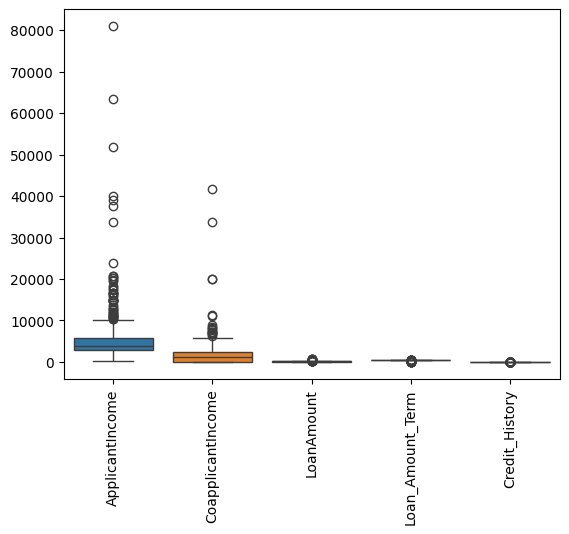

In [24]:
sns.boxplot(data=ds)
plt.xticks(rotation=90)
plt.show()

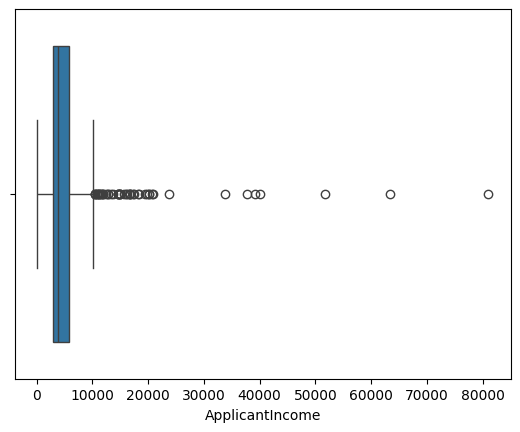

In [25]:
sns.boxplot(x="ApplicantIncome", data= ds)
plt.show()

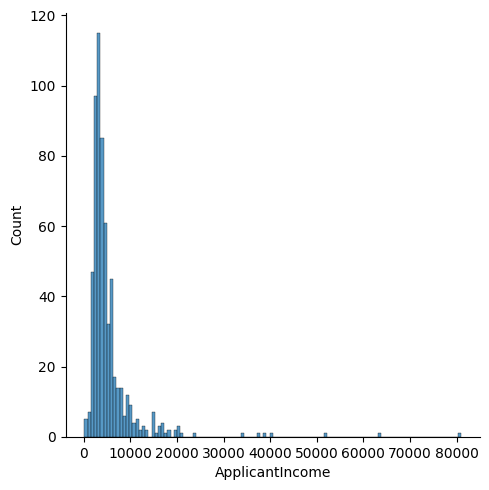

In [26]:
sns.displot(ds["ApplicantIncome"])

In [28]:
Q1=ds["ApplicantIncome"].quantile(0.25)
Q3=ds["ApplicantIncome"].quantile(0.75)
IQR=Q3-Q1
Q1,Q3,IQR

(2877.5, 5795.0, 2917.5)

In [29]:
min_range = ds["ApplicantIncome"].mean() - 3*ds["ApplicantIncome"].std()
max_range = ds["ApplicantIncome"].mean() + 3*ds["ApplicantIncome"].std()
min_range, max_range

(-12923.66573677391, 23730.584303549156)

In [30]:
new_ds2 = ds[ds["ApplicantIncome"] <= max_range]

In [31]:
new_ds2.shape

(606, 13)

<ipython-input-47-ed3c023a8f5a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_ds2["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

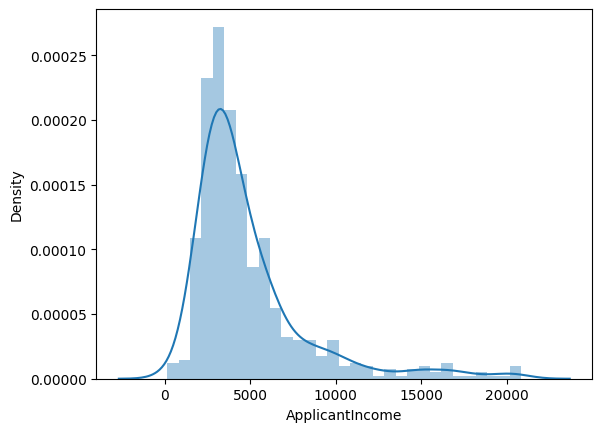

In [47]:
sns.distplot(new_ds2["ApplicantIncome"])

In [34]:
#### using Z-Score to remove outliers

In [41]:
mean = ds["ApplicantIncome"].mean()
std = ds["ApplicantIncome"].std()
z_score = (ds["ApplicantIncome"] - mean)/ std

z_score

,ApplicantIncome
0,0.072931
1,-0.134302
2,-0.393427
3,-0.461686
4,0.097649
...,...
609,-0.409796
610,-0.212383
611,0.436818
612,0.356773


In [43]:
ds["z_score"] = z_score
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072931
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134302
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393427
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.461686
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.409796
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212383
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.436818
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.356773


In [44]:
new_dss_zcore = ds[ds["z_score"] <= 3]
new_dss_zcore.shape

(606, 14)

<ipython-input-46-deb66f4470fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dss_zcore["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

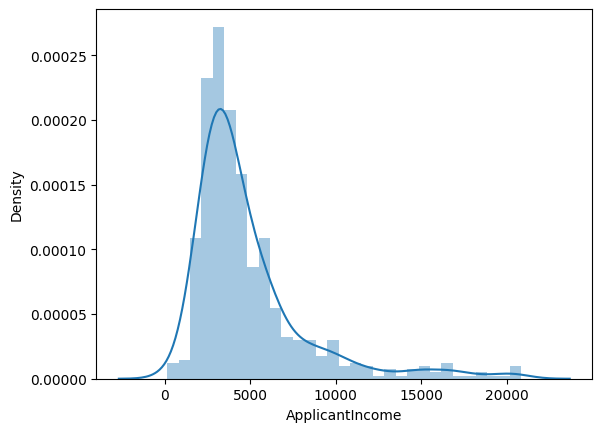

In [46]:
sns.distplot(new_dss_zcore["ApplicantIncome"])